# Project: The Movie Database (TMDb) Project

## Table of Contents

- <a href='#intro'>1. Project Overview and Objectives</a> 
    - <a href='#dataset'>1.1. Data Set Description</a>
    - <a href='#Chest_radiographs'>1.2. What is Chest_radiographs?</a>
    - <a href='#Coronavirus'>1.2. What is Coronavirus?</a>
    - <a href='#Lung_Opacity'>1.2. What is Lung Opacity?</a>
    - <a href='#Pheumonia'>1.2. What is Pheumonia?</a>
- <a href="#wrangling">2. Data Wrangling</a>
- <a href="#eda">3. Exploratory Data Analysis</a>
- <a href='#pre'>4. Preprocessing DataSet</a>
    - <a href='#info'>4.1. Show Information Of DataSet</a>
    - <a href='#save'>4.2. Save DataSet After Preprocessing</a>
- <a href='#cnn'>5. CNN Model</a>
    - <a href='#aug'>5.1. Data Augmentation</a>
        - <a href='#apply'>5.1.1. Apply</a>
        - <a href='#demo'>5.1.2. Demo</a>
    - <a href='#build'>5.2. Model Building</a>
    - <a href='#perf'>5.3. Model Performance</a>
    - <a href='#tensor'>5.4. Convert Model Keras To TensorFlow</a>
- <a href='#concl'>. Conclusions</a>

<a id='intro'></a>
## Project Overview and Objectives

***
We will collect data about x-ray images of diseases from 3 datasets namely chest-xray-pneumonia and covid19-radiography-database by taking ( COVID , Normal , Lung_Opacity ) from ( covid19-radiography-database  ) and ( PNEUMONIA ) from ( covid19-radiography-database ) and then we do a training for that data until we get a model that can predict these rays in the future , also we will answer some of the questions regarding these rays.

- Which disease has a number of recurrences more?
- How many people have diseases and how many people do not get sick? 

***

<a id='dataset'></a>
## Data Set Description

The image data that was used for this problem is [ Chest X-Ray ] (https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) & (https://www.kaggle.com/tawsifurrahman/covid19-radiography-database). 
It conists of Chest X-Ray scans of four classes:

* `Covid_19` - no tumor, encoded as `0`
* `Lung Opacity` - no tumor, encoded as `1`
* `Normal` - no tumor, encoded as `2`
* `Pheumonia` - tumor, encoded as `3`

<a id='Chest_radiographs'></a>
## What is Chest radiographs ?

> Chest radiographs are used to diagnose many conditions involving the chest wall, including its bones, and also structures contained within the thoracic cavity including the lungs, heart, and great vessels. Pneumonia and congestive heart failure are very commonly diagnosed by chest radiograph. Chest radiographs are also used to screen for job-related lung disease in industries such as mining where workers are exposed to dust.

>For some conditions of the chest, radiography is good for screening but poor for diagnosis. When a condition is suspected based on chest radiography, additional imaging of the chest can be obtained to definitively diagnose the condition or to provide evidence in favor of the diagnosis suggested by initial chest radiography. Unless a fractured rib is suspected of being displaced, and therefore likely to cause damage to the lungs and other tissue structures, x-ray of the chest is not necessary as it will not alter patient management. 
>
> ![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Normal_posteroanterior_%28PA%29_chest_radiograph_%28X-ray%29.jpg/280px-Normal_posteroanterior_%28PA%29_chest_radiograph_%28X-ray%29.jpg)
>
Source: [Wikipedia](https://en.wikipedia.org/wiki/Chest_radiograph)

<a id='Coronavirus'></a>
## What is Coronavirus ?

> Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in Wuhan, China, in December 2019. The disease has since spread worldwide, leading to an ongoing pandemic.
Symptoms of COVID‑19 are variable, but often include fever,cough, headache, fatigue, breathing difficulties, loss of smell, and loss of taste. Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms.
>
> ![](https://upload.wikimedia.org/wikipedia/commons/9/94/Coronavirus._SARS-CoV-2.png)
>
Source: [Wikipedia](https://en.wikipedia.org/wiki/COVID-19)

<a id='Lung_Opacity'></a>
## What is Lung Opacity ?

> Lung Opacity is known Ground-glass opacity (GGO) is a finding seen on chest x-ray (radiograph) or computed tomography (CT) imaging of the lungs. It is typically defined as an area of hazy opacification (x-ray) or increased attenuation (CT) due to air displacement by fluid, airway collapse, fibrosis, or a neoplastic process. When a substance other than air fills an area of the lung it increases that area's density. .
>
> ![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/CT_of_infiltrates_of_pneumocystis_pneumonia.jpg/800px-CT_of_infiltrates_of_pneumocystis_pneumonia.jpg)

Source: [Wikipedia](https://en.wikipedia.org/wiki/Ground-glass_opacity)

<a id='Pheumonia'></a>
## What is Pheumonia ?

> Pneumonia is an inflammatory condition of the lung primarily affecting the small air sacs known as alveoli. Symptoms typically include some combination of productive or dry cough, chest pain, fever, and difficulty breathing. The severity of the condition is variable.

>Pneumonia is usually caused by infection with viruses or bacteria, and less commonly by other microorganisms. Identifying the responsible pathogen can be difficult. Diagnosis is often based on symptoms and physical examination. Chest X-rays, blood tests, and culture of the sputum may help confirm the diagnosis. The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.

>Risk factors for pneumonia include cystic fibrosis, chronic obstructive pulmonary disease (COPD), sickle cell disease, asthma, diabetes, heart failure, a history of smoking, a poor ability to cough (such as following a stroke), and a weak immune system.

> ![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Chest_radiograph_in_influensa_and_H_influenzae%2C_posteroanterior%2C_annotated.jpg/300px-Chest_radiograph_in_influensa_and_H_influenzae%2C_posteroanterior%2C_annotated.jpg)

Source: [Wikipedia](https://en.wikipedia.org/wiki/Pneumonia)

# Importing libraries

In [1]:
from IPython.display import clear_output
!pip install imutils
clear_output()
import imutils

In [2]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D , Activation, Dropout, BatchNormalization, Flatten, Dense,AveragePooling2D
from tensorflow.keras.preprocessing import image
from keras.callbacks import ModelCheckpoint ,ReduceLROnPlateau ,EarlyStopping
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam,RMSprop
import matplotlib.pyplot as plt
import seaborn 
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2
import shutil
import itertools
from keras import layers
import random
from sklearn.model_selection import train_test_split
import random

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
#we will extract covid and normal x ray from covid19-radiography-database 
path_covid = '../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID'
path_normal = '../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal'
path_lung_opacity = '../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity'

#we will extract PNEUMONIA and normal x ray from covid19-radiography-database 
path_pneumonia = '../input/chest-xray-pneumonia/chest_xray'

### {0: 'Covid_19', 1: 'Lung Opacity' ,2: 'Normal', 3: 'Pheumonia}

In [4]:
random.seed(42)
filenames = os.listdir(path_covid) + random.sample(os.listdir(path_normal), 6000) + random.sample(os.listdir(path_lung_opacity),3500)

name_images = []
for name_image in filenames:
    name_images.append(name_image.split('/')[-1])
    
categories = []
list_class_categories = []
list_type_categories = []

for filename in filenames:
    category = filename.split('-')[0]
    if category == 'COVID':
        categories.append(str(0))
        list_class_categories.append('Positive')
        list_type_categories.append('COVID')
    elif category == 'Lung_Opacity':
        categories.append(str(1))
        list_class_categories.append('Positive')
        list_type_categories.append('Lung_Opacity')
    else:
        categories.append(str(2))
        list_class_categories.append('Negative')
        list_type_categories.append('Normal')


for i in range(len(filenames)):
    if 'COVID' in filenames[i]:
        filenames[i] = os.path.join(path_covid, filenames[i])
    elif 'Lung_Opacity' in filenames[i]:
        filenames[i] = os.path.join(path_lung_opacity, filenames[i])
    else:
        filenames[i] = os.path.join(path_normal, filenames[i])
    

In [5]:
#read data from path = '../input/chest-xray-pneumonia'
list_path = []
list_path_files = []

for path in  os.listdir(path_pneumonia):
    if path.find("_"):
        list_path.append(path_pneumonia+'/'+path)
        
for i in range(1,len(list_path)):    
    for path in  os.listdir(list_path[i]):
        if path.find("NORMAL"):
            list_path_files.append(list_path[i]+'/'+path)
            

list_files = [] 
list_categories = []
list_names = []
list_class_categories_new = []
list_type_categories_new = []

for index in range(len(list_path_files)):
    for filename in os.listdir(list_path_files[index]):
        list_categories.append(str(3))
        if 'bacteria' in filename:
            list_class_categories_new.append('Positive')
            list_type_categories_new.append('Pnemonia Bacteria')
        elif 'virus' in filename:
            list_class_categories_new.append('Positive')
            list_type_categories_new.append('Pnemonia Virus')
            
for index in range(len(list_path_files)):
    for filename in os.listdir(list_path_files[index]):
        if 'bacteria' in filename:
            list_files.append(os.path.join(list_path_files[index], filename))
            list_names.append(filename)
        elif 'virus' in filename:
            list_files.append(os.path.join(list_path_files[index], filename))
            list_names.append(filename)

In [6]:
files = filenames + list_files
categories_image = categories + list_categories
name_img = name_images + list_names 
classes = list_class_categories + list_class_categories_new 
types = list_type_categories +  list_type_categories_new

df = pd.DataFrame({'filename': files,'category': categories_image,'name_image' : name_img , 'class' : classes , 'type' : types })

In [7]:
df.category.unique()

array(['0', '2', '1', '3'], dtype=object)

In [8]:
df.head()

,filename,category,name_image,class,type
0,../input/covid19-radiography-database/COVID-19...,0,COVID-1994.png,Positive,COVID
1,../input/covid19-radiography-database/COVID-19...,0,COVID-1825.png,Positive,COVID
2,../input/covid19-radiography-database/COVID-19...,0,COVID-517.png,Positive,COVID
3,../input/covid19-radiography-database/COVID-19...,0,COVID-532.png,Positive,COVID
4,../input/covid19-radiography-database/COVID-19...,0,COVID-2272.png,Positive,COVID


In [9]:
df.to_csv('DataSet_Chest_X_Ray.csv')

#### Gathering Data

In [10]:
df = pd.read_csv('DataSet_Chest_X_Ray.csv')

#### View information of data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17389 entries, 0 to 17388
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17389 non-null  int64 
 1   filename    17389 non-null  object
 2   category    17389 non-null  int64 
 3   name_image  17389 non-null  object
 4   class       17389 non-null  object
 5   type        17389 non-null  object
dtypes: int64(2), object(4)
memory usage: 815.2+ KB


#### View missing data

In [12]:
df.isnull().sum()

Unnamed: 0    0
filename      0
category      0
name_image    0
class         0
type          0
dtype: int64

#### View duplicated data

In [13]:
sum(df.duplicated())

0

In [14]:
df['class'].unique()

array(['Positive', 'Negative'], dtype=object)

In [15]:
df['type'].unique()

array(['COVID', 'Normal', 'Lung_Opacity', 'Pnemonia Bacteria',
       'Pnemonia Virus'], dtype=object)

In [16]:
df['category'].unique()

array([0, 2, 1, 3])

<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1 : Which disease has a number of recurrences more?

we will create a list of the type to find the recurrences for each type

In [17]:
list_type = df['type'].unique()  #list of type
dict_type = {}
for category in list_type:
    count = len(df[df['type'] == category])
    dict_type[category]= count

In [18]:
dict_type

{'COVID': 3616,
 'Normal': 6000,
 'Lung_Opacity': 3500,
 'Pnemonia Bacteria': 2780,
 'Pnemonia Virus': 1493}

In [19]:
# to extract type by using high recurrences
high_category = max(dict_type.values())
type_cat = ''
for types , count in dict_type.items():
    if high_category == count:
        type_cat = types
        break
        
type_cat , high_category

('Normal', 6000)

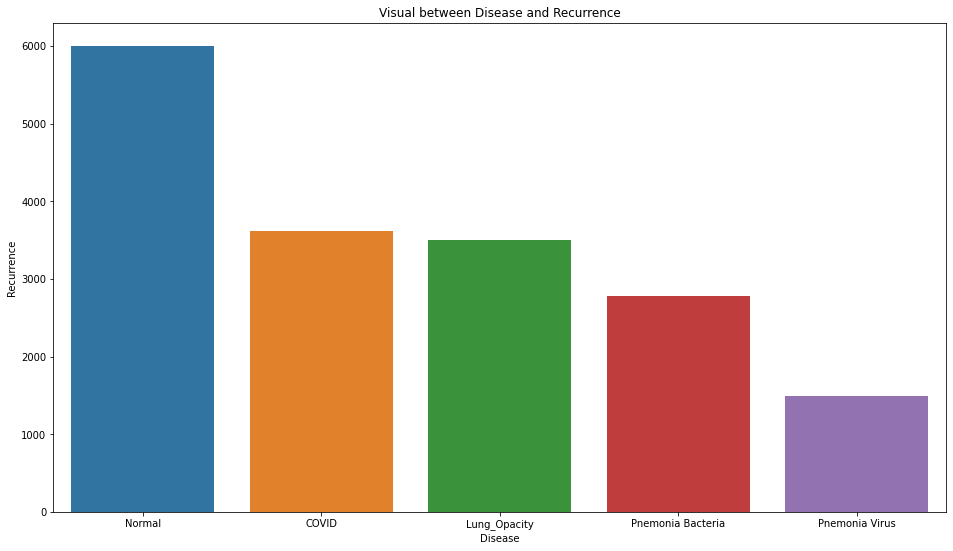

In [20]:
fig, ax =  plt.subplots(figsize =(16, 9)) 
ax.set_title('Visual between Disease and Recurrence')
plt.xlabel('Disease')
plt.ylabel('Recurrence')
dict_type = dict(sorted(dict_type.items(), key=lambda item: item[1],reverse=True))
dict_seaborn ={}
for category , count in dict_type.items():
    dict_seaborn[category] =count
seaborn.barplot(x=list(dict_seaborn.keys()),y=list(dict_seaborn.values()))
plt.show()

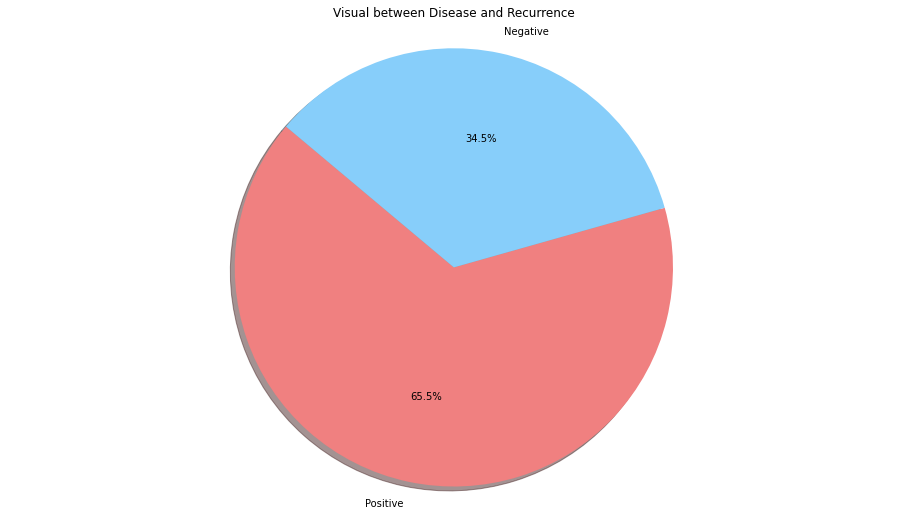

In [50]:
plt.subplots(figsize =(16, 9)) 
plt.title('Visual between Disease and Recurrence')
labels = dict_seaborn.keys()
sizes = dict_seaborn.values()
colors = ['lightcoral', 'lightskyblue','red','turquoise']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [22]:
print("Answer :It becomes clear to us that the category owner of the highest recurrence is "+list(dict_type.keys())[0]+" which amounts to his recurrence {} .".format(list(dict_type.values())[0]))

Answer :It becomes clear to us that the category owner of the highest recurrence is Normal which amounts to his recurrence 6000 .


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


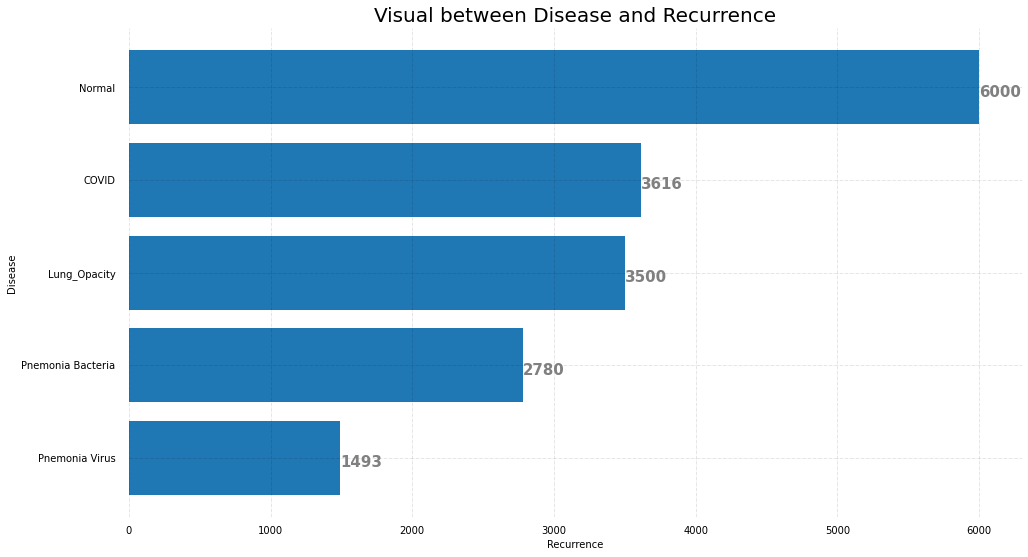

In [23]:
category = list(dict_seaborn.keys())
count = list(dict_seaborn.values())
  
fig, ax = plt.subplots(figsize =(16, 9)) 
ax.barh(category, count) 
  
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

ax.invert_yaxis() 
  
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 15, fontweight ='bold', 
             color ='grey') 
plt.xlabel('Recurrence')
plt.ylabel('Disease')
ax.set_title('Visual between Disease and Recurrence', fontsize=20)
# Show Plot 
plt.show(); 

### Question 2 : How many people have diseases and how many people do not get sick?

In [24]:
list_class = df['class'].unique()  #list of genre
dict_class = {}
for category in list_class:
    count = len(df[df['class'] == category])
    dict_class[category]= count

In [25]:
dict_class

{'Positive': 11389, 'Negative': 6000}

In [26]:
# to extract genre by using high revenue
high_class = max(dict_class.values())
class_cat = ''
for classes , count in dict_class.items():
    if high_class == count:
        class_cat = classes
        break
        
class_cat , high_class

('Positive', 11389)

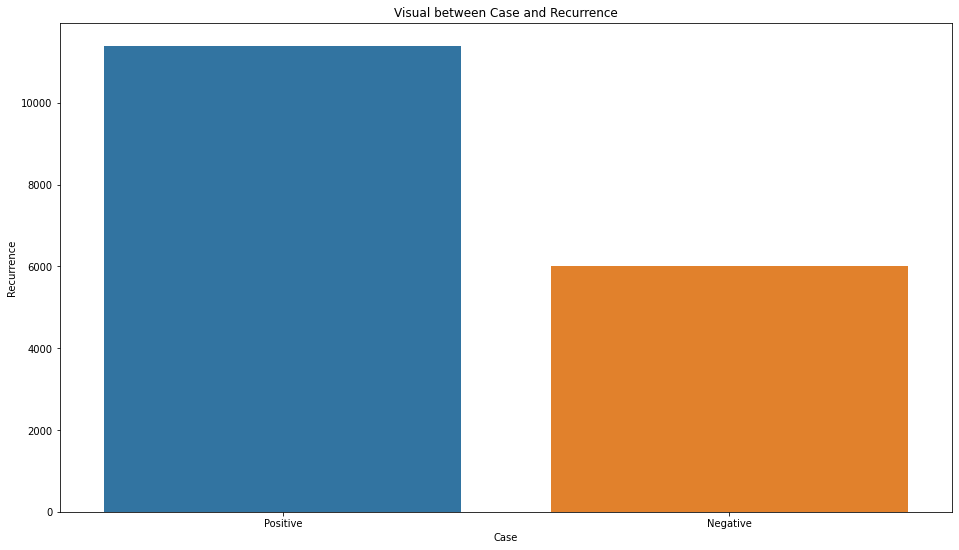

In [27]:
fig, ax =  plt.subplots(figsize =(16, 9)) 
ax.set_title('Visual between Case and Recurrence')
plt.xlabel('Case')
plt.ylabel('Recurrence')
dict_class = dict(sorted(dict_class.items(), key=lambda item: item[1],reverse=True))
dict_seaborn ={}
for category , count in dict_class.items():
    dict_seaborn[category] =count
seaborn.barplot(x=list(dict_seaborn.keys()),y=list(dict_seaborn.values()))
plt.show()

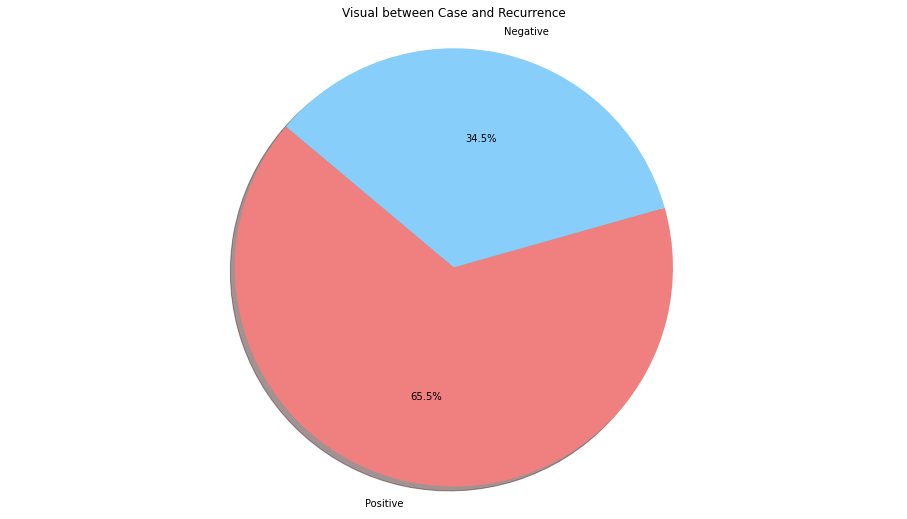

In [28]:
plt.subplots(figsize =(16, 9)) 
plt.title('Visual between Case and Recurrence')
labels = dict_seaborn.keys()
sizes = dict_seaborn.values()
colors = ['lightcoral', 'lightskyblue','red','turquoise','redyellow']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [29]:
print("Answer :It becomes clear to us that the Case owner of the highest recurrence is "+list(dict_class.keys())[0]+" which amounts to his recurrence {} .".format(list(dict_class.values())[0]))

Answer :It becomes clear to us that the Case owner of the highest recurrence is Positive which amounts to his recurrence 11389 .


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


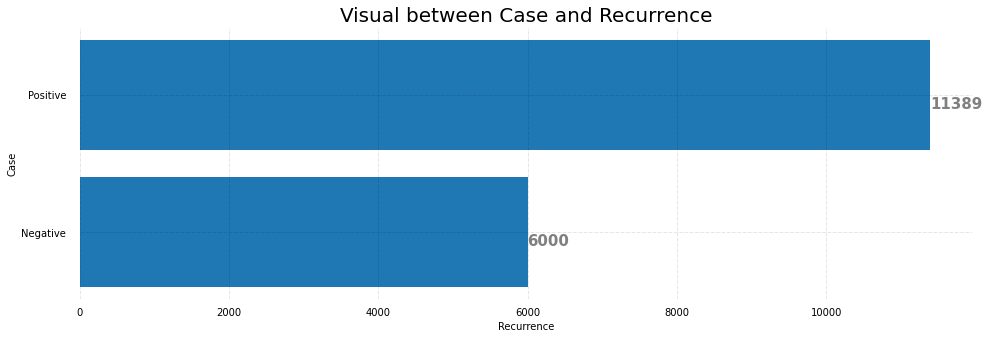

In [30]:
class_cat = list(dict_class.keys())
count = list(dict_class.values())
  
fig, ax = plt.subplots(figsize =(16, 5)) 
ax.barh(class_cat, count) 
  
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

ax.invert_yaxis() 
  
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 15, fontweight ='bold', 
             color ='grey') 
plt.xlabel('Recurrence')
plt.ylabel('Case')
ax.set_title('Visual between Case and Recurrence', fontsize=20)
# Show Plot 
plt.show(); 

<a id='pre'></a>
## Preprocessing DataSet

In [31]:
df_covid = df[df['category'] == 0]
df_lung_opacity = df[df['category'] == 1]
df_normal = df[df['category'] == 2]

df_pnemonia = df[df['category'] == 3]

#70% train   20% valid    10% test
# data of covid
df_co = df_covid
validate_data_covid = df_covid.sample(frac = 0.2)
train_data_covid = df_covid.drop(validate_data_covid.index)
validate_data_covid= validate_data_covid.reset_index()
train_data_covid = train_data_covid.reset_index()

test_data_covid = train_data_covid.sample(frac = 0.1)
train_data_covid = train_data_covid.drop(test_data_covid.index)
test_data_covid= test_data_covid.reset_index()
train_data_covid = train_data_covid.reset_index()

#data of normal
df_nor = df_normal
validate_data_normal = df_normal.sample(frac = 0.2)
train_data_normal = df_normal.drop(validate_data_normal.index)
validate_data_normal= validate_data_normal.reset_index()
train_data_normal = train_data_normal.reset_index()
test_data_normal = train_data_normal.sample(frac = 0.1)
train_data_normal = train_data_normal.drop(test_data_normal.index)
test_data_normal= test_data_normal.reset_index()
train_data_normal = train_data_normal.reset_index()


#data of lung_opacity
df_pn = df_lung_opacity
validate_data_lung_opacity = df_lung_opacity.sample(frac = 0.2)
train_data_lung_opacity = df_lung_opacity.drop(validate_data_lung_opacity.index)
validate_data_lung_opacity= validate_data_lung_opacity.reset_index()
train_data_lung_opacity = train_data_lung_opacity.reset_index()
test_data_lung_opacity  = train_data_lung_opacity.sample(frac = 0.1)
train_data_lung_opacity = train_data_lung_opacity.drop(test_data_lung_opacity.index)
test_data_lung_opacity= test_data_lung_opacity.reset_index()
train_data_lung_opacity = train_data_lung_opacity.reset_index()


#data of lung_opacity
df_pn = df_pnemonia
validate_data_pnemonia = df_pnemonia.sample(frac = 0.2)
train_data_pnemonia = df_pnemonia.drop(validate_data_pnemonia.index)
validate_data_pnemonia= validate_data_pnemonia.reset_index()
train_data_pnemonia = train_data_pnemonia.reset_index()
test_data_pnemonia   = train_data_pnemonia.sample(frac = 0.1)
train_data_pnemonia = train_data_pnemonia.drop(test_data_pnemonia.index)
test_data_pnemonia= test_data_pnemonia.reset_index()
train_data_pnemonia = train_data_pnemonia.reset_index()

<a id='info'></a>
## Show Information Of DataSet

In [32]:
len(validate_data_covid) , len(test_data_covid) , len(train_data_covid) ,len(df_co)

(723, 289, 2604, 3616)

In [33]:
len(validate_data_lung_opacity) , len(test_data_lung_opacity) , len(train_data_lung_opacity) ,len(df_pn)

(700, 280, 2520, 4273)

In [34]:
len(validate_data_normal) , len(test_data_normal) , len(train_data_normal) ,len(df_nor)

(1200, 480, 4320, 6000)

In [35]:
len(validate_data_pnemonia) , len(test_data_pnemonia) , len(train_data_pnemonia) ,len(df_pn)

(855, 342, 3076, 4273)

<a id='save'></a>
##  Save DataSet After Preprocessing

In [36]:
!mkdir TRAIN  TRAIN/Covid_19 TRAIN/Lung_Opacity TRAIN/Normal TRAIN/Pneumonia 

!mkdir VAL  VAL/Covid_19 VAL/Lung_Opacity VAL/Normal VAL/Pneumonia

!mkdir TEST  TEST/Covid_19 TEST/Lung_Opacity TEST/Normal TEST/Pneumonia

In [37]:
IMG_SIZE = (500,500)
def process_save_img(size,full_path_img,name_image,new_folder):
    img = cv2.imread(full_path_img)
    img = cv2.resize(img,dsize=IMG_SIZE,interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(new_folder+'/'+name_image, img)

In [38]:
#Data train for all
for filename,name_image in tqdm(zip(train_data_normal['filename'],train_data_normal['name_image'])):
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Normal')
print('finish TRAIN/Normal')
for filename,name_image in tqdm(zip(train_data_covid['filename'],train_data_covid['name_image'])):
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Covid_19')
print('finish TRAIN/Covid_19')
for filename,name_image in tqdm(zip(train_data_lung_opacity['filename'],train_data_lung_opacity['name_image'])):
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Lung_Opacity')
print('finish TRAIN/Lung_Opacity')
for filename,name_image in tqdm(zip(train_data_pnemonia['filename'],train_data_pnemonia['name_image'])):
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Pneumonia')
print('finish TRAIN/Pneumonia')



#Data test for all
for filename,name_image in tqdm(zip(test_data_normal['filename'],test_data_normal['name_image'])):
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Normal')
print('finish TEST/Normal')
for filename,name_image in tqdm(zip(test_data_covid['filename'],test_data_covid['name_image'])):
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Covid_19')
print('finish TEST/Covid_19')
for filename,name_image in tqdm(zip(test_data_lung_opacity['filename'],test_data_lung_opacity['name_image'])):
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Lung_Opacity')
print('finish TEST/Lung_Opacity')
for filename,name_image in tqdm(zip(test_data_pnemonia['filename'],test_data_pnemonia['name_image'])):
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Pneumonia')
print('finish TEST/Pneumonia')


#Data valid for all
for filename,name_image in tqdm(zip(validate_data_normal['filename'],validate_data_normal['name_image'])):
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Normal')
print('finish VAL/Normal')
for filename,name_image in tqdm(zip(validate_data_covid['filename'],validate_data_covid['name_image'])):
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Covid_19')
print('finish VAL/Covid_19')
for filename,name_image in tqdm(zip(validate_data_lung_opacity['filename'],validate_data_lung_opacity['name_image'])):
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Lung_Opacity')
print('finish VAL/Lung_Opacity')
for filename,name_image in tqdm(zip(validate_data_pnemonia['filename'],validate_data_pnemonia['name_image'])):
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Pneumonia')
print('finish VAL/Pneumonia')

4320it [01:23, 51.98it/s]


finish TRAIN/Normal


2604it [00:48, 53.84it/s]


finish TRAIN/Covid_19


2520it [00:46, 53.76it/s]


finish TRAIN/Lung_Opacity


3076it [01:09, 44.39it/s]


finish TRAIN/Pneumonia


480it [00:09, 51.40it/s]


finish TEST/Normal


289it [00:05, 55.34it/s]


finish TEST/Covid_19


280it [00:05, 54.15it/s]


finish TEST/Lung_Opacity


342it [00:07, 47.07it/s]


finish TEST/Pneumonia


1200it [00:22, 53.61it/s]


finish VAL/Normal


723it [00:12, 57.42it/s]


finish VAL/Covid_19


700it [00:12, 55.48it/s]


finish VAL/Lung_Opacity


855it [00:18, 46.21it/s]

finish VAL/Pneumonia


In [39]:
path_normal_train = 'TRAIN/Normal'
print(len(os.listdir(path_normal_train)))
path_corona_train = 'TRAIN/Covid_19'
print(len(os.listdir(path_corona_train)))
path_lung_opacity_train = 'TRAIN/Lung_Opacity'
print(len(os.listdir(path_lung_opacity_train)))
path_pneumonia_train = 'TRAIN/Pneumonia'
print(len(os.listdir(path_pneumonia_train)))

path_normal_test = 'TEST/Normal'
print(len(os.listdir(path_normal_test)))
path_corona_test = 'TEST/Covid_19'
print(len(os.listdir(path_corona_test)))
path_lung_opacity_test = 'TEST/Lung_Opacity'
print(len(os.listdir(path_lung_opacity_test)))
path_pneumonia_test = 'TEST/Pneumonia'
print(len(os.listdir(path_pneumonia_test)))


path_normal_val = './VAL/Normal'
print(len(os.listdir(path_normal_val)))
path_corona_val = 'VAL/Covid_19'
print(len(os.listdir(path_corona_val)))
path_lung_opacity_val = 'VAL/Lung_Opacity'
print(len(os.listdir(path_lung_opacity_val)))
path_pneumonia_val = 'VAL/Pneumonia'
print(len(os.listdir(path_pneumonia_val)))

4320
2604
2520
3076
480
289
280
342
1200
723
700
855


In [40]:
def plot_sample_new(path,labels_dict,start,end):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    plt.figure(figsize=(20,15))
    plt.suptitle('{}'.format(labels_dict))
    for img_name in tqdm(sorted(os.listdir(path))):   #tqdm --> progress bar 
        full_path_img = path + '/' + img_name
        img = cv2.imread(full_path_img, 0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(5,5,start)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        start += 1
        if start == end:
                break

<a id='cnn'></a>
## CNN Model

<a id='aug'></a>
## Data Augmentation

<a id='apply'></a>
## Apply

In [41]:
train_gen = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_gen = ImageDataGenerator(rescale = 1./255)

In [42]:
batch_size = 16
train_path = './TRAIN'
test_path = './TEST'
valid_path = './VAL'
train = train_gen.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='grayscale',
      class_mode='categorical',
      batch_size=batch_size
      )

test = test_gen.flow_from_directory(
      test_path,
      target_size=IMG_SIZE,
      color_mode='grayscale',
      shuffle=False, 
      class_mode='categorical',
      batch_size=batch_size
      )


valid = test_gen.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='grayscale',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 12520 images belonging to 4 classes.
Found 1391 images belonging to 4 classes.
Found 3478 images belonging to 4 classes.


<a id='demo'></a>
## Demo

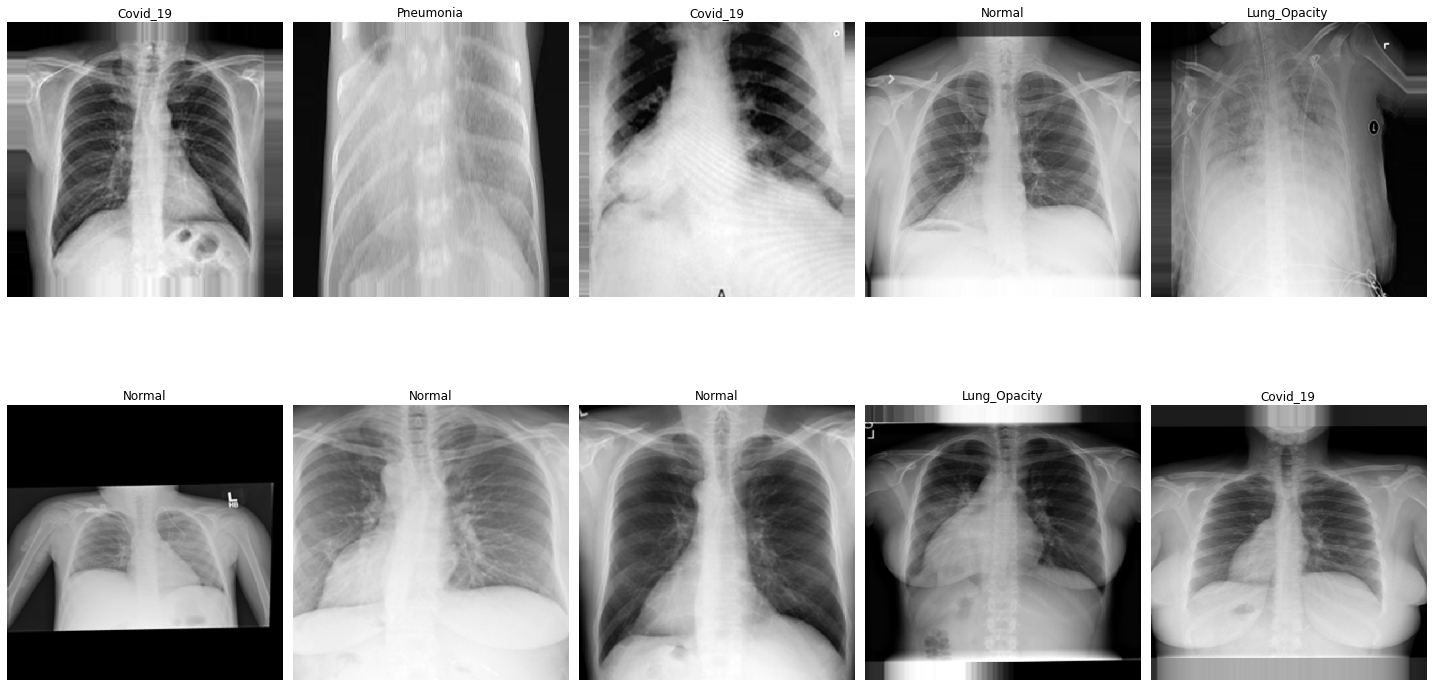

In [43]:
idx2label_dict = {train.class_indices[k]: k for k in train.class_indices}
idx2label_dict
plt.figure(figsize=(20, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(idx2label_dict.get(np.argmax(Y_batch[0])))    
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

<a id='build'></a>
## Model Building

In [44]:
input_shape = (500,500,1)
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'softmax', units = 4))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
cnn.summary()

2022-02-15 12:33:07.069092: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        1

2022-02-15 12:33:07.167219: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-15 12:33:07.167959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-15 12:33:07.169372: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-15 12:33:07.170416: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

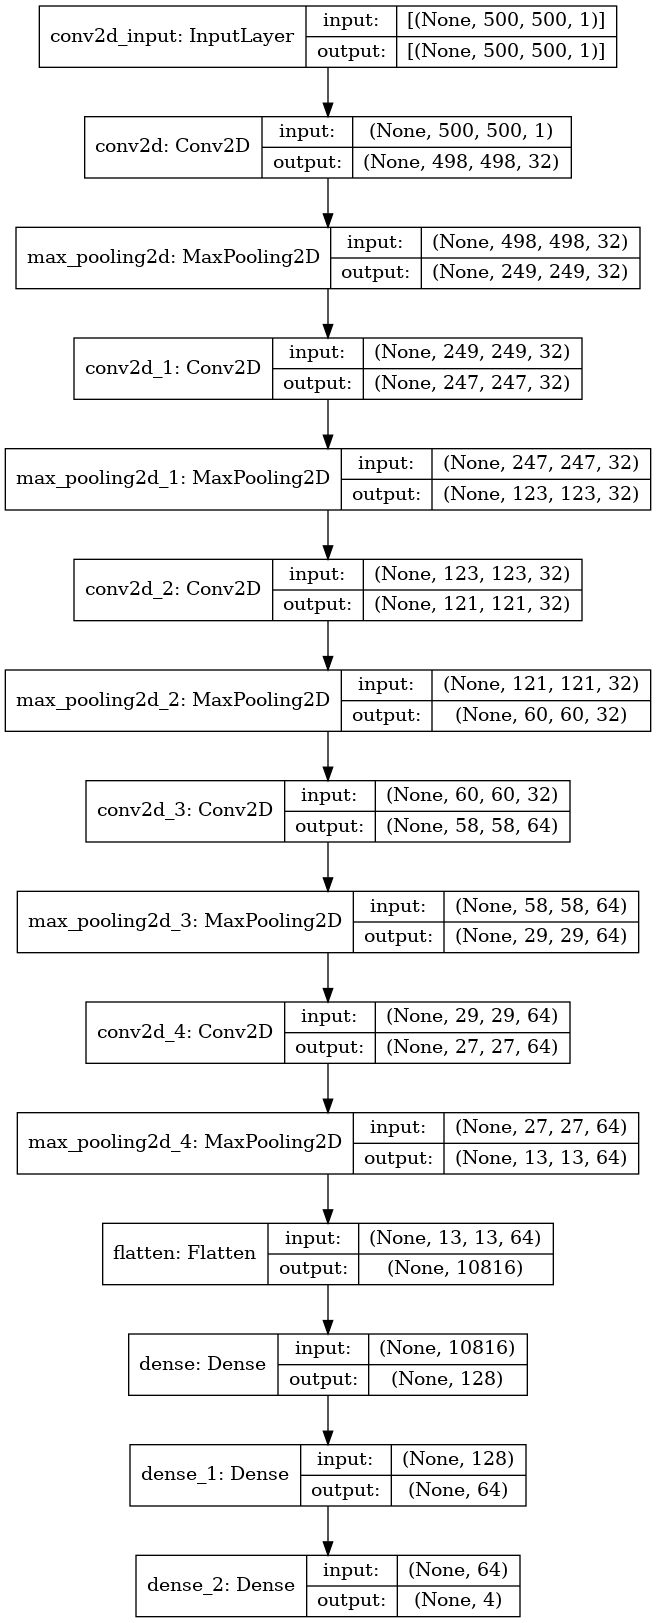

In [45]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [46]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [47]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(train.classes), train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 1.2019969278033795, 1: 1.242063492063492, 2: 0.7245370370370371, 3: 1.017555266579974}


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3], y=[0 0 0 ... 3 3 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [48]:
EPOCHS = 50

history = cnn.fit(
    train,
    epochs=EPOCHS,
    validation_data=valid,
    class_weight=cw,
    callbacks=callbacks_list
)

2022-02-15 12:33:10.814428: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-02-15 12:33:12.731493: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


783/783 [==============================] - 306s 381ms/step - loss: 0.8391 - accuracy: 0.6370 - val_loss: 0.6036 - val_accuracy: 0.7398
Epoch 2/50
783/783 [==============================] - 299s 382ms/step - loss: 0.6099 - accuracy: 0.7498 - val_loss: 0.5917 - val_accuracy: 0.7547
Epoch 3/50
783/783 [==============================] - 298s 380ms/step - loss: 0.5219 - accuracy: 0.7939 - val_loss: 0.4154 - val_accuracy: 0.8505
Epoch 4/50
783/783 [==============================] - 298s 380ms/step - loss: 0.4712 - accuracy: 0.8157 - val_loss: 0.3758 - val_accuracy: 0.8614
Epoch 5/50
783/783 [==============================] - 298s 381ms/step - loss: 0.4302 - accuracy: 0.8352 - val_loss: 0.3731 - val_accuracy: 0.8585
Epoch 6/50
783/783 [==============================] - 302s 386ms/step - loss: 0.3870 - accuracy: 0.8490 - val_loss: 0.3356 - val_accuracy: 0.8695
Epoch 7/50
783/783 [==============================] - 301s 384ms/step - loss: 0.3664 - accuracy: 0.8588 - val_loss: 0.3119 - val_accura

In [49]:
cnn.save('./Chest_X_Ray_Model.h5')

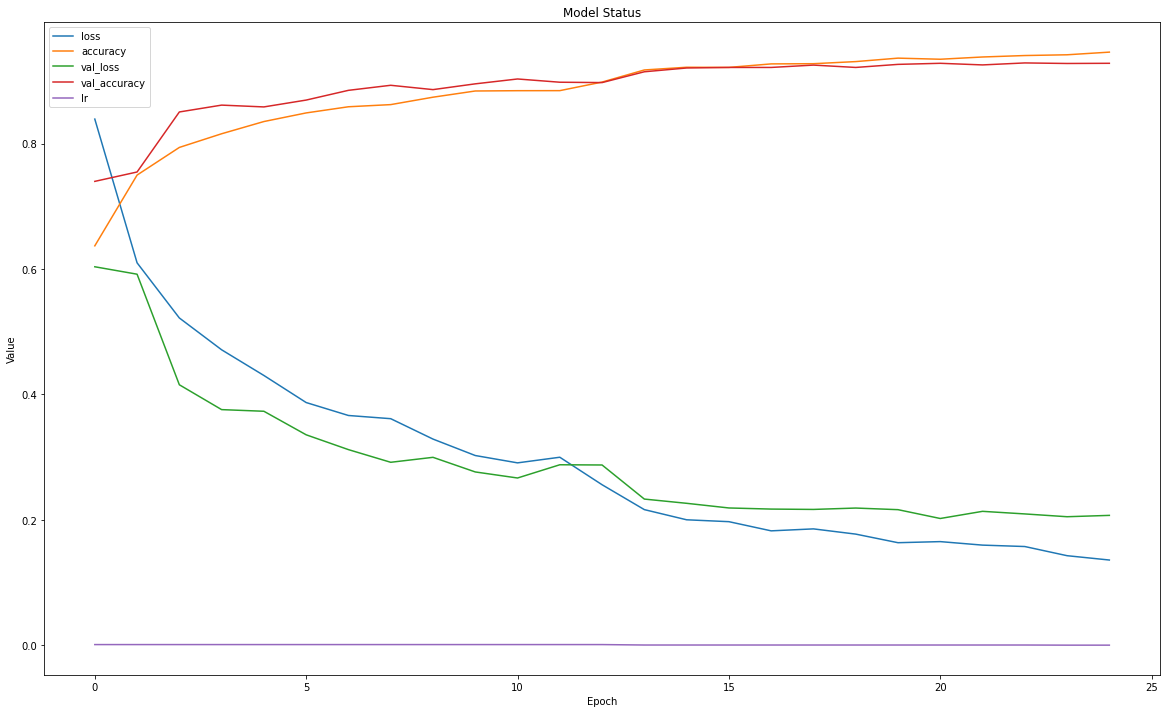

In [51]:
pd.DataFrame(history.history).plot(figsize=(20, 12))
plt.title('Model Status')
plt.ylabel('Value')
plt.xlabel('Epoch');

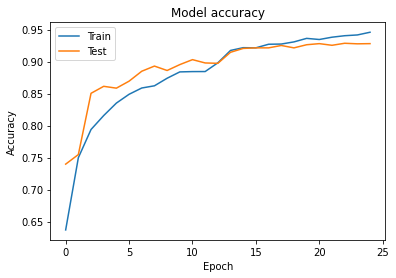

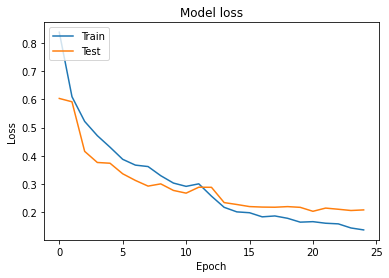

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<a id='perf'></a>
## Model Performance

In [53]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

87/87 [==============================] - 11s 125ms/step - loss: 0.1963 - accuracy: 0.9339
The testing accuracy is : 93.38605403900146 %


In [ ]:
#from keras.models import load_model
#model = load_model('./Chest_X_Ray_Model.h5')

87/87 [==============================] - 11s 122ms/step - loss: 0.1963 - accuracy: 0.9339
The testing accuracy is : 93.38605403900146 %
confusion matrix :
 [[273  11   4   1]
 [  5 254  21   0]
 [  6  41 431   2]
 [  0   0   1 341]]
Precision Score :  0.9338605319913731
Recall Score :  0.9338605319913731
classification_report :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       289
           1       0.83      0.91      0.87       280
           2       0.94      0.90      0.92       480
           3       0.99      1.00      0.99       342

    accuracy                           0.93      1391
   macro avg       0.93      0.94      0.93      1391
weighted avg       0.94      0.93      0.93      1391



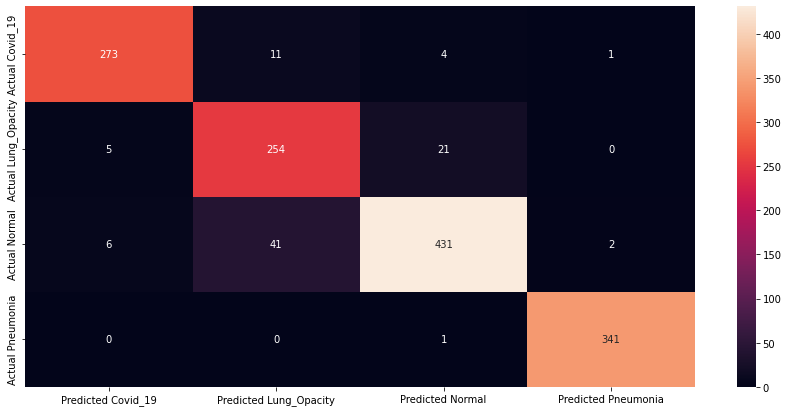

In [83]:
predict_x=cnn.predict(test) 
y_pred=np.argmax(predict_x,axis=1)
idx2label_dict = {test.class_indices[k]: k for k in test.class_indices}
y_true = test.classes


plt.figure(figsize = (15,7))

cm = pd.DataFrame(data=confusion_matrix(y_true, y_pred, labels=[0, 1,2,3]),
                  index=["Actual Covid_19", "Actual Lung_Opacity", "Actual Normal", "Actual Pneumonia"],
columns=["Predicted Covid_19", "Predicted Lung_Opacity","Predicted Normal","Predicted Pneumonia"])

seaborn.heatmap(cm,annot=True,fmt="d");

test_accuracy = cnn.evaluate(test)
print('The testing accuracy is :',test_accuracy[1]*100, '%')
print('confusion matrix :\n',confusion_matrix(y_true,y_pred))
print("Precision Score : ",precision_score(y_true, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_true, y_pred, pos_label='positive',average='micro'))
print('classification_report :\n',classification_report(y_true,y_pred))

In [55]:
valid_test = test_gen.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='grayscale',
      shuffle=False, 
      class_mode='categorical',
      batch_size=batch_size
      )

train_test = test_gen.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='grayscale',
      shuffle=False, 
      class_mode='categorical',
      batch_size=batch_size
      )

Found 3478 images belonging to 4 classes.
Found 12520 images belonging to 4 classes.


218/218 [==============================] - 27s 123ms/step - loss: 0.2071 - accuracy: 0.9281
The validing accuracy is : 92.81195998191833 %
confusion matrix :
 [[ 677   19   23    4]
 [  13  606   81    0]
 [  16   90 1090    4]
 [   0    0    0  855]]
Precision Score :  0.9281196089706728
Recall Score :  0.9281196089706728
classification_report :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       723
           1       0.85      0.87      0.86       700
           2       0.91      0.91      0.91      1200
           3       0.99      1.00      1.00       855

    accuracy                           0.93      3478
   macro avg       0.93      0.93      0.93      3478
weighted avg       0.93      0.93      0.93      3478



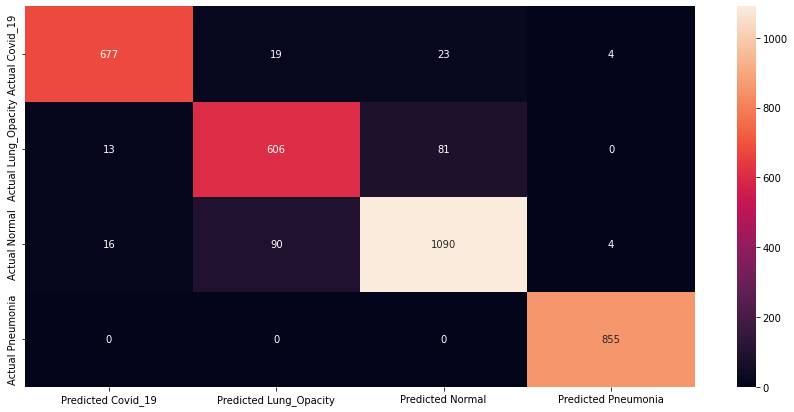

In [56]:
predict_x=cnn.predict(valid_test) 
y_pred=np.argmax(predict_x,axis=1)
idx2label_dict = {valid_test.class_indices[k]: k for k in valid_test.class_indices}
y_true = valid_test.classes

plt.figure(figsize = (15,7))

cm = pd.DataFrame(data=confusion_matrix(y_true, y_pred, labels=[0, 1,2,3]),
                  index=["Actual Covid_19", "Actual Lung_Opacity", "Actual Normal", "Actual Pneumonia"],
                  columns=["Predicted Covid_19", "Predicted Lung_Opacity","Predicted Normal","Predicted Pneumonia"])

seaborn.heatmap(cm,annot=True,fmt="d");

valid_test_accuracy = cnn.evaluate(valid_test)
print('The validing accuracy is :',valid_test_accuracy[1]*100, '%')
print('confusion matrix :\n',confusion_matrix(y_true,y_pred))
print("Precision Score : ",precision_score(y_true, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_true, y_pred, pos_label='positive',average='micro'))
print('classification_report :\n',classification_report(y_true,y_pred))

783/783 [==============================] - 96s 122ms/step - loss: 0.1058 - accuracy: 0.9614
The training accuracy is : 96.14217281341553 %
confusion matrix :
 [[2567   21   14    2]
 [  23 2352  145    0]
 [  25  241 4046    8]
 [   0    0    4 3072]]
Precision Score :  0.9614217252396167
Recall Score :  0.9614217252396167
classification_report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2604
           1       0.90      0.93      0.92      2520
           2       0.96      0.94      0.95      4320
           3       1.00      1.00      1.00      3076

    accuracy                           0.96     12520
   macro avg       0.96      0.96      0.96     12520
weighted avg       0.96      0.96      0.96     12520



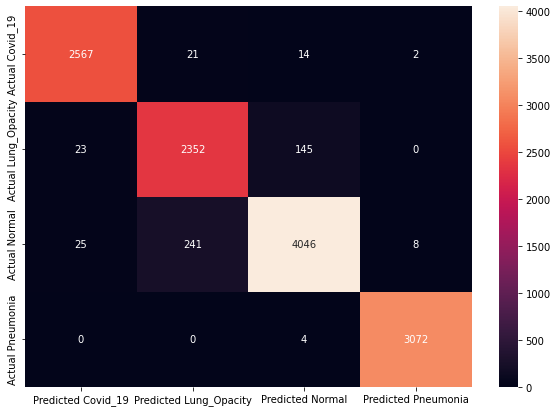

In [57]:
predict_x=cnn.predict(train_test) 
y_pred=np.argmax(predict_x,axis=1)
idx2label_dict = {train_test.class_indices[k]: k for k in train_test.class_indices}
y_true = train_test.classes

plt.figure(figsize = (10,7))

cm = pd.DataFrame(data=confusion_matrix(y_true, y_pred, labels=[0, 1,2,3]),
                  index=["Actual Covid_19", "Actual Lung_Opacity", "Actual Normal", "Actual Pneumonia"],
columns=["Predicted Covid_19", "Predicted Lung_Opacity","Predicted Normal","Predicted Pneumonia"])

seaborn.heatmap(cm,annot=True,fmt="d");

train_test_accuracy = cnn.evaluate(train_test)
print('The training accuracy is :',train_test_accuracy[1]*100, '%')
print('confusion matrix :\n',confusion_matrix(y_true,y_pred))
print("Precision Score : ",precision_score(y_true, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_true, y_pred, pos_label='positive',average='micro'))
print('classification_report :\n',classification_report(y_true,y_pred))

In [84]:
idx2label_dict = {train.class_indices[k]: k for k in train.class_indices}
idx2label_dict

{0: 'Covid_19', 1: 'Lung_Opacity', 2: 'Normal', 3: 'Pneumonia'}

[3.6045046e-06 9.8615867e-01 1.3837644e-02 2.9359351e-10]
1 1 0.98615867
[0. 0. 0. 1.]
3 3 1.0
[9.9992239e-01 2.2771856e-06 6.5726890e-05 9.6186668e-06]
0 0 0.9999224
[1.2942142e-03 5.5844679e-02 9.4286114e-01 1.9685954e-11]
2 2 0.94286114
[2.0644064e-05 1.2062029e-02 9.8791736e-01 1.4412507e-09]
2 2 0.98791736
[9.9996483e-01 2.9455909e-05 5.6895233e-06 2.1535371e-08]
0 0 0.99996483
[3.8997796e-06 6.5902361e-07 9.7793990e-01 2.2055604e-02]
2 2 0.9779399
[9.8820749e-07 9.9604475e-01 3.9543309e-03 8.0498563e-10]
1 1 0.99604475
[1.1485071e-05 3.9300166e-02 9.6068841e-01 7.1029055e-10]
2 2 0.9606884
[2.5002461e-08 2.1194890e-02 9.7880256e-01 2.6036109e-06]
2 2 0.97880256
[0.15774384 0.19669479 0.6428094  0.002752  ]
2 2 0.6428094
[1.08554275e-04 2.57345140e-02 9.74156976e-01 4.18406430e-08]
2 2 0.974157
[4.4523675e-02 4.0270701e-02 9.1520458e-01 9.7604254e-07]
2 2 0.9152046
[9.0796709e-01 4.3082748e-02 4.8945073e-02 5.0859107e-06]
0 0 0.9079671
[1.3514632e-06 5.8547435e-08 2.0974552e-08 9.

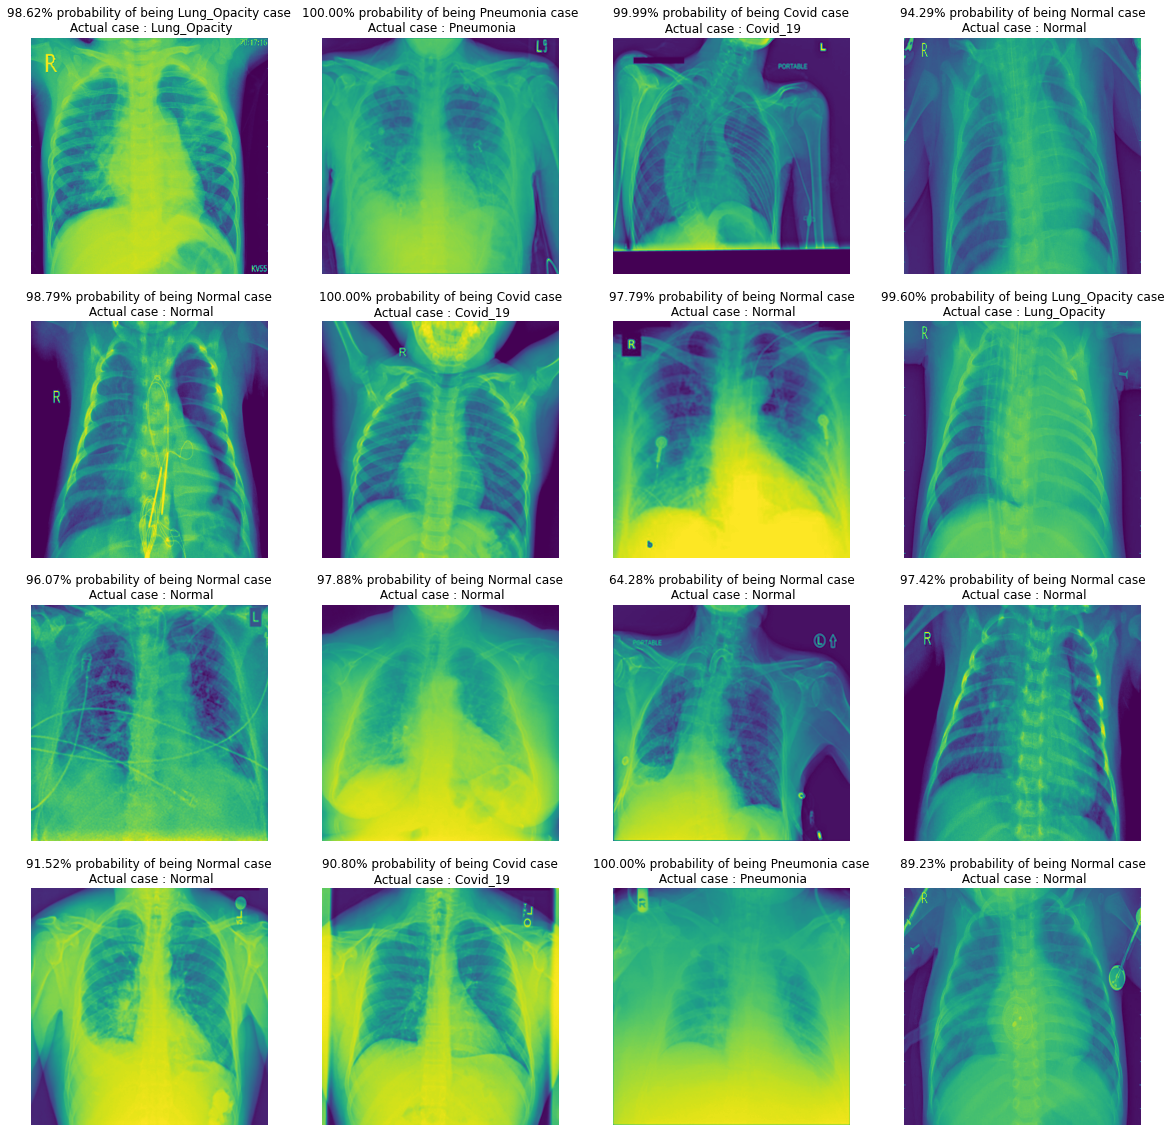

In [114]:
plt.figure(figsize=(20,20))
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
randomlist = random.sample(range(0, 1322), 16)
index_list = 0
for i in range(0+228, 16+228):
        plt.subplot(4, 4, (i-228)+1)
        if y_true[randomlist[index_list]] == 0: 
              print(predict_x[randomlist[index_list]])
              index = np.argmax(predict_x[randomlist[index_list]],axis=0)
              out = ('{:.2%} probability of being Covid case'.format(predict_x[randomlist[index_list]][index]))
              print(y_pred[randomlist[index_list]] ,index , predict_x[randomlist[index_list]][index])
        elif y_true[randomlist[index_list]] == 1: 
              print(predict_x[randomlist[index_list]])
              index = np.argmax(predict_x[randomlist[index_list]],axis=0)
              out = ('{:.2%} probability of being Lung_Opacity case'.format(predict_x[randomlist[index_list]][index]))
              print(y_pred[randomlist[index_list]] ,index , predict_x[randomlist[index_list]][index])
        elif y_true[randomlist[index_list]] == 2: 
              print(predict_x[randomlist[index_list]])
              index = np.argmax(predict_x[randomlist[index_list]],axis=0)
              out = ('{:.2%} probability of being Normal case'.format(predict_x[randomlist[index_list]][index]))
              print(y_pred[randomlist[index_list]] ,index , predict_x[randomlist[index_list]][index])
        else: 
              print(predict_x[randomlist[index_list]])
              index = np.argmax(predict_x[randomlist[index_list]],axis=0)
              out = ('{:.2%} probability of being Pneumonia case'.format(predict_x[randomlist[index_list]][index]))
              print(y_pred[randomlist[index_list]] ,index , predict_x[randomlist[index_list]][index])
            
        plt.title(out+"\n Actual case : "+ idx2label_dict.get(y_true[randomlist[index_list]]))    
        plt.imshow(np.squeeze(x[randomlist[index_list]]))
        plt.axis('off')
        index_list = index_list + 1
plt.show()

In [90]:
img = cv2.imread('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1001.png')
img = cv2.resize(img,dsize=(500,500),interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
input_arr = tf.keras.preprocessing.image.img_to_array(gray)
input_arr = np.array([input_arr]) 
input_arr = input_arr.astype('float32') / 255.  
predictions = cnn.predict(input_arr)
print(np.argmax(predictions,axis=1)   ,predictions)

[3] [[9.1209849e-08 3.1233218e-09 8.5189149e-06 9.9999142e-01]]


<a id='tensor'></a>
## Convert Model Keras To TensorFlow

In [75]:
from tensorflow import keras
from tensorflow import lite
saved_model_dir = './Chest_X_Ray_Model.h5'
model = keras.models.load_model(saved_model_dir)
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("Chest_X_Ray_Model.tflite","wb").write(tflite_model)

2022-02-15 15:10:24.554502: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-02-15 15:10:25.755727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-15 15:10:25.756144: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-02-15 15:10:25.756271: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-02-15 15:10:25.757475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-15 15:10:25.757945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had ne

5874880

In [76]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="./Chest_X_Ray_Model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1 500 500   1] <class 'numpy.float32'>

1 output(s):
[1 4] <class 'numpy.float32'>


<a id='concl'></a>
## Conclusions

> This project was a combination of CNN model classification problem (to predict wheter the subject has COVID19 virus or Pneumonia or Lung_Opacity or not). 
The final accuracy is much higher than 92% baseline (random guess). However, it could be increased by larger number of train images or through model hyperparameters tuning.

> A chest radiograph, called a chest X-ray (CXR), or chest film, is a projection radiograph of the chest used to diagnose conditions affecting the chest, its contents, and nearby structures. Chest radiographs are the most common film taken in medicine. 

> We fetched a database from two sources that were previously mentioned, and then categorized the database into: 70% for training, 10% for testing, and 20% for prediction.
Then we built a convolutional neural network (cnn) model until we ran the 50epoch model so that the model would have the ability to predict the future, and that was a percentage of  92% accuracy.
